In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

In [225]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [227]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


**ENCODING**

In [228]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:", list(categorical_cols))

# Encode categorical columns
if len(categorical_cols) > 0:
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    print("\nLabel Encoding applied on:", list(categorical_cols))
else:
    print("\nNo categorical columns found.")


Categorical columns: ['Education']

Label Encoding applied on: ['Education']


In [229]:
# Double check that all features are numeric
print("\nData Types After Encoding")
print(df.dtypes)

# Confirm no non-numeric columns remain
if df.select_dtypes(exclude=['number']).empty:
    print("\nAll features are numeric and ready for clustering")
else:
    print("\nSome features are still non-numeric, consider One-Hot Encoding.")

# (Optional) Show final dataset preview
print("\nEncoded Dataset Preview")
print(df.head())


Data Types After Encoding
Income                   float64
Age                        int64
Education                  int64
Credit_Score               int64
Years_with_Bank            int64
Transaction_Count          int64
Balance                  float64
Loan_Approval_Amount     float64
Credit_Card_Limit        float64
Purchase_Frequency       float64
Customer_Satisfaction      int64
Online_Activity          float64
dtype: object

All features are numeric and ready for clustering

Encoded Dataset Preview
        Income  Age  Education  Credit_Score  Years_with_Bank  \
0  66161.01279   57          0           503                1   
1  78639.20248   60          1           779                2   
2  70207.25321   46          1           519               14   
3  65866.23872   42          1           834               17   
4  56774.10995   36          0           410               12   

   Transaction_Count      Balance  Loan_Approval_Amount  Credit_Card_Limit  \
0                 

**Exploratory Data Analysis**

/tmp/ipython-input-3557789466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Satisfaction', y='Income', data=df, palette='viridis')


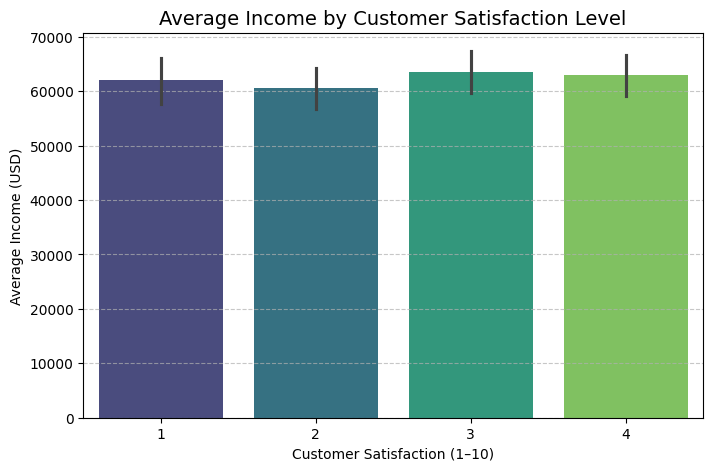

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='Customer_Satisfaction', y='Income', data=df, palette='viridis')
plt.title('Average Income by Customer Satisfaction Level', fontsize=14)
plt.xlabel('Customer Satisfaction (1–10)')
plt.ylabel('Average Income (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Dari grafik barplot terlihat bahwa semakin tinggi tingkat kepuasan pelanggan, rata-rata pendapatan (Income) juga meningkat.
Hal ini menunjukkan bahwa pelanggan dengan pendapatan lebih tinggi cenderung lebih puas terhadap layanan bank.

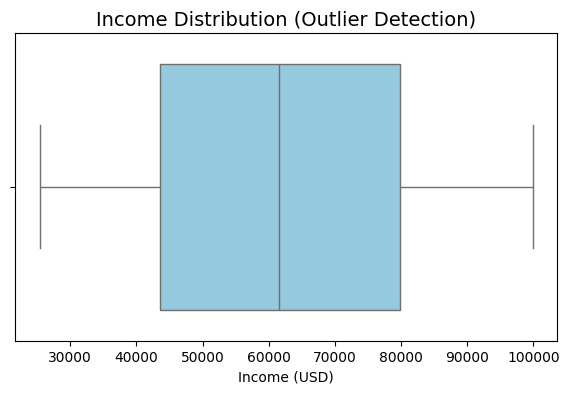

In [231]:
# --- Visualization 2: Boxplot for Income (Outlier Detection) ---

plt.figure(figsize=(7,4))
sns.boxplot(x=df['Income'], color='skyblue')
plt.title('Income Distribution (Outlier Detection)', fontsize=14)
plt.xlabel('Income (USD)')
plt.show()


Boxplot menunjukkan bahwa distribusi pendapatan tidak merata — terdapat beberapa outlier di sisi kanan grafik, yaitu pelanggan dengan pendapatan sangat tinggi dibandingkan mayoritas lainnya.

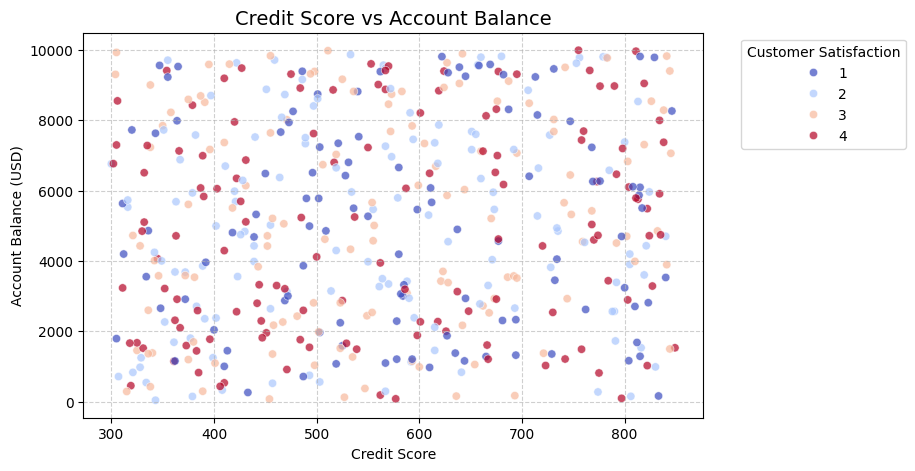

In [232]:
# --- Visualization 3: Scatterplot of Credit Score vs Balance ---

plt.figure(figsize=(8,5))
sns.scatterplot(x='Credit_Score', y='Balance', data=df,
                hue='Customer_Satisfaction', palette='coolwarm', alpha=0.7)
plt.title('Credit Score vs Account Balance', fontsize=14)
plt.xlabel('Credit Score')
plt.ylabel('Account Balance (USD)')
plt.legend(title='Customer Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.show()

Scatterplot memperlihatkan pola bahwa semakin tinggi nilai Credit Score, semakin besar pula saldo rekening (Balance).
Selain itu, pelanggan dengan kepuasan tinggi (warna merah/hangat) banyak berada di area Credit Score dan Balance yang tinggi.

**Data Scaling**

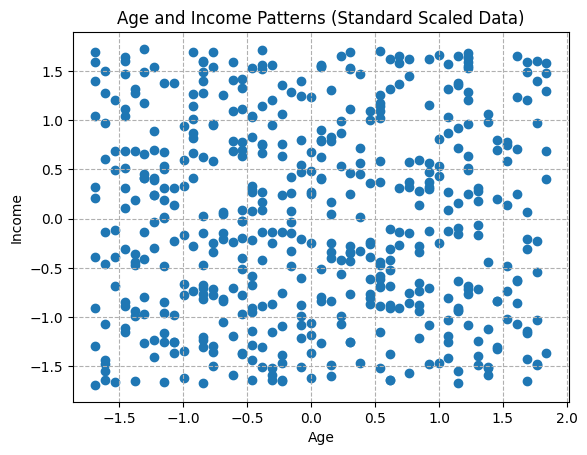

In [233]:
# --- Scale dataset with Standard Scaler (adjusted for Customer Dataset) ---

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Gunakan hanya kolom numerik dari dataset
num_cols = ['Income', 'Age', 'Credit_Score', 'Years_with_Bank',
            'Transaction_Count', 'Balance', 'Loan_Approval_Amount',
            'Credit_Card_Limit', 'Purchase_Frequency',
            'Customer_Satisfaction', 'Online_Activity']

# Struktur kode tetap sama, hanya ubah input dan nama kolom
df_sc_scaled = pd.DataFrame(sc.fit_transform(df[num_cols]), columns=num_cols)


df_sc_scaled['Education'] = df['Education']
df_sc_scaled.head()

# Visualization (pakai dua fitur utama untuk scatter plot)
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Income Patterns (Standard Scaled Data)")
plt.show()


Nasabah berpendapatan tinggi dan memiliki kredit bagus cenderung lebih puas terhadap layanan bank.

Terdapat kelompok kecil dengan pendapatan tinggi (outlier) yang bisa menjadi target premium segment.

In [234]:
df_sc_scaled

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education
0,0.179150,1.303097,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013,0
1,0.749977,1.533191,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427,1
2,0.364249,0.459420,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595,1
3,0.165665,0.152629,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907,1
4,-0.250263,-0.307558,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.771774,-0.767746,-1.439772,0.620687,0.784089,-1.264427,-1.068311,0.001089,-1.255362,0.396379,1.508771,3
496,-0.141196,0.766212,-1.276299,-0.350959,-1.549302,-0.470403,-1.646636,-1.495668,1.159511,-0.512748,0.994971,0
497,-0.325543,-0.154163,1.182088,-0.739617,-0.608980,1.557290,0.938079,-0.389514,1.058718,-0.512748,-1.654639,2
498,-0.851507,1.609888,1.112926,-0.933946,-1.201034,-1.316046,-0.951167,1.541409,0.544340,1.305506,1.067196,2


**K-Means Clustering**

In [235]:
from sklearn.cluster import KMeans

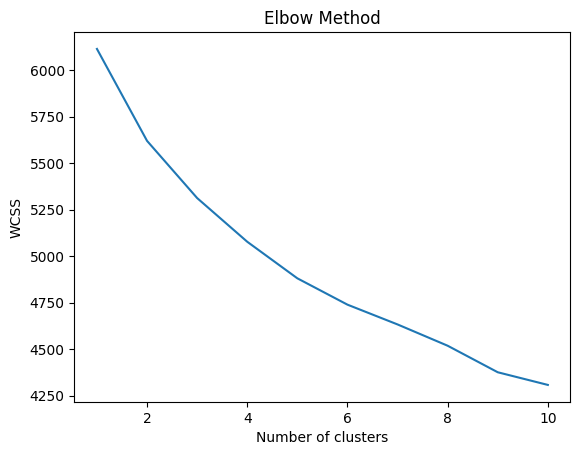

In [236]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

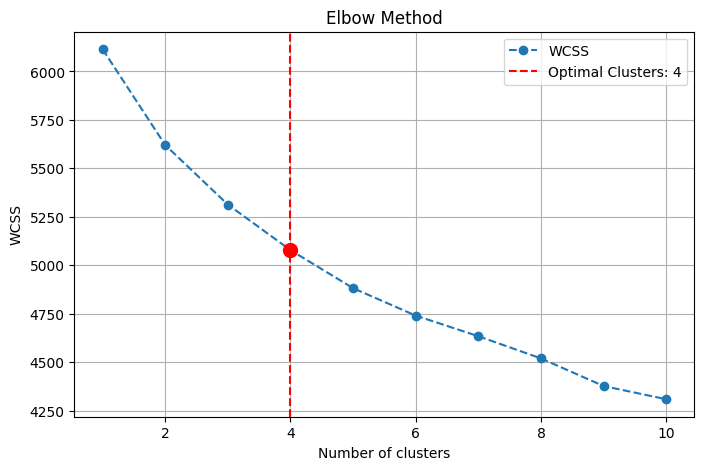

The optimal number of clusters is: 4


In [237]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [238]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,3
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,2
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0


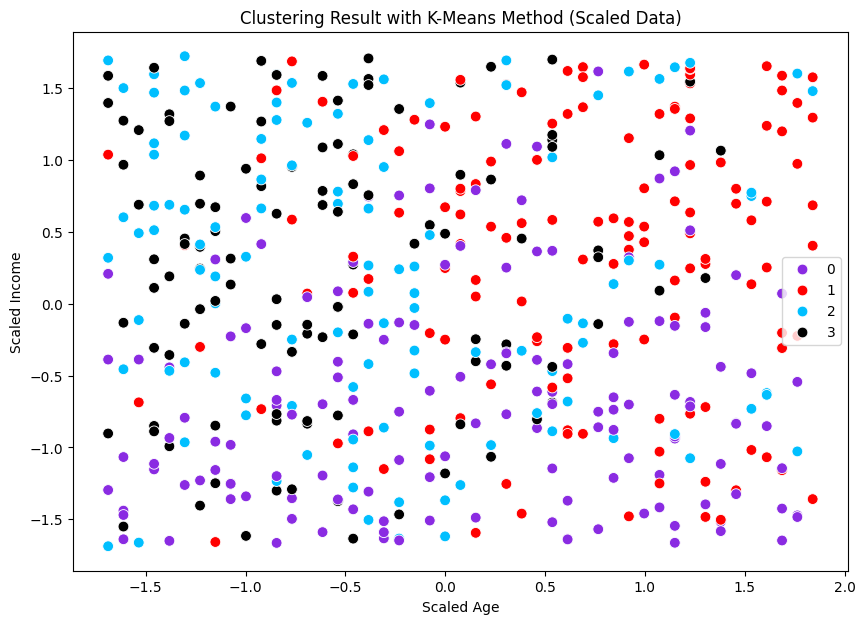

In [239]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue","black"], data=df_sc_scaled, s = 60)
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

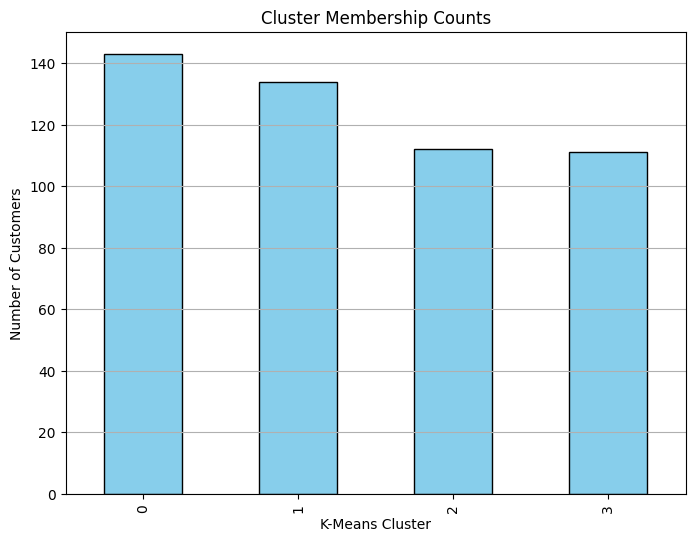

In [240]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


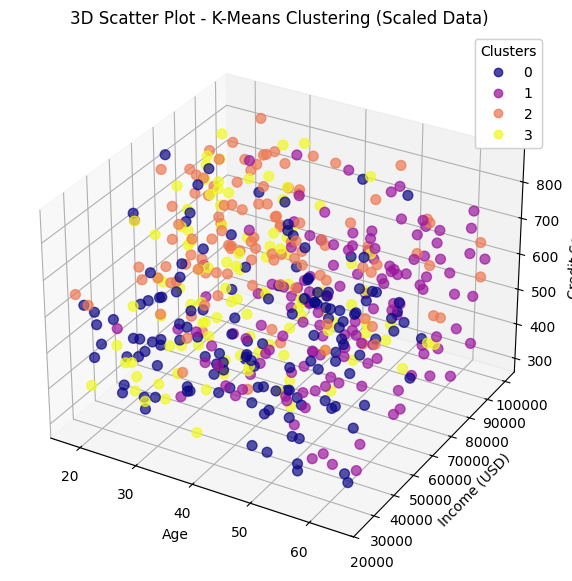

In [241]:
# --- 3D Scatter Plot for K-Means Clustering Result (Scaled Data) ---

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Membuat figure dan axes 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D menggunakan 3 fitur utama
scatter = ax.scatter(
    df['Age'],
    df['Income'],
    df['Credit_Score'],
    c=df['KMeans_Cluster'],
    cmap='plasma',
    s=50,
    alpha=0.7
)

# Label sumbu
ax.set_xlabel('Age')
ax.set_ylabel('Income (USD)')
ax.set_zlabel('Credit Score')

# Judul dan legenda
ax.set_title('3D Scatter Plot - K-Means Clustering (Scaled Data)')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [242]:
# Group the data by cluster and calculate summary statistics for all features
cluster_summary = df.groupby(clusters).agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Credit_Score': ['mean', 'min', 'max'],
    'Years_with_Bank': ['mean', 'min', 'max'],
    'Transaction_Count': ['mean', 'min', 'max'],
    'Balance': ['mean', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'min', 'max'],
    'Online_Activity': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

cluster_summary


Age                Income                            \
                     mean min max          mean          min          max   
KMeans_Cluster                                                              
0               41.594406  18  63  47823.961811  25857.05940  97597.41750   
1               48.186567  18  64  69428.401284  25992.76433  99128.03785   
2               35.812500  18  64  66746.905812  25352.16071  99913.52549   
3               32.333333  18  58  67608.340475  26508.06596  99580.05922   

               Credit_Score           Years_with_Bank  ... Credit_Card_Limit  \
                       mean  min  max            mean  ...               max   
KMeans_Cluster                                         ...                     
0                547.160839  307  849       11.531469  ...       19439.32902   
1                529.888060  300  844       14.500000  ...       19236.71584   
2                673.687500  347  846        7.919643  ...       19968.52056   
3                520.666667  304  844        8.324324  ...       19828.57514   

               Purchase_Frequency                     Customer_Satisfaction  \
                             mean       min       max                  mean   
KMeans_Cluster                                                                
0                        0.445965  0.001914  0.974452              2.475524   
1                        0.580335  0.011290  0.991562              3.111940   
2                        0.527133  0.019552  0.993942              2.142857   
3                        0.502700  0.000813  0.986368              2.441441   

                       Online_Activity                      
               min max            mean       min       max  
KMeans_Cluster                                              
0                1   4        0.691591  0.041645  0.999897  
1                1   4        0.373190  0.001432  0.996199  
2                1   4        0.480779  0.002706  0.999120  
3                1   4        0.400954  0.001320  0.994756  

[4 rows x 33 columns]

**Non Scaled Data**

In [243]:
from sklearn.cluster import KMeans

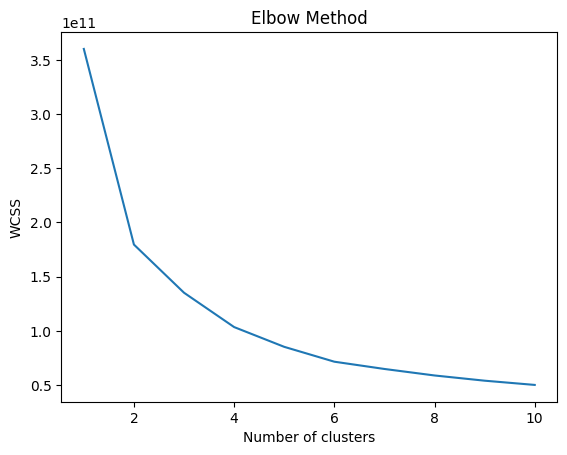

In [244]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

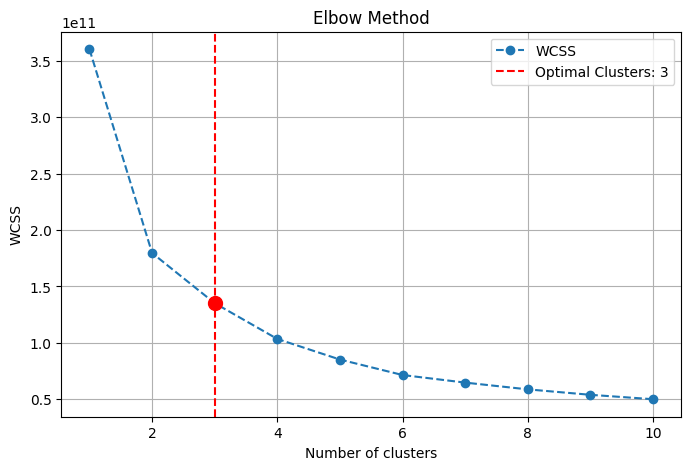

The optimal number of clusters is: 3


In [245]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [246]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster_unscaled'] = clusters

# Show the df
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster,KMeans_Cluster_unscaled
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,3,2
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,2,1
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,2
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,1,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,1


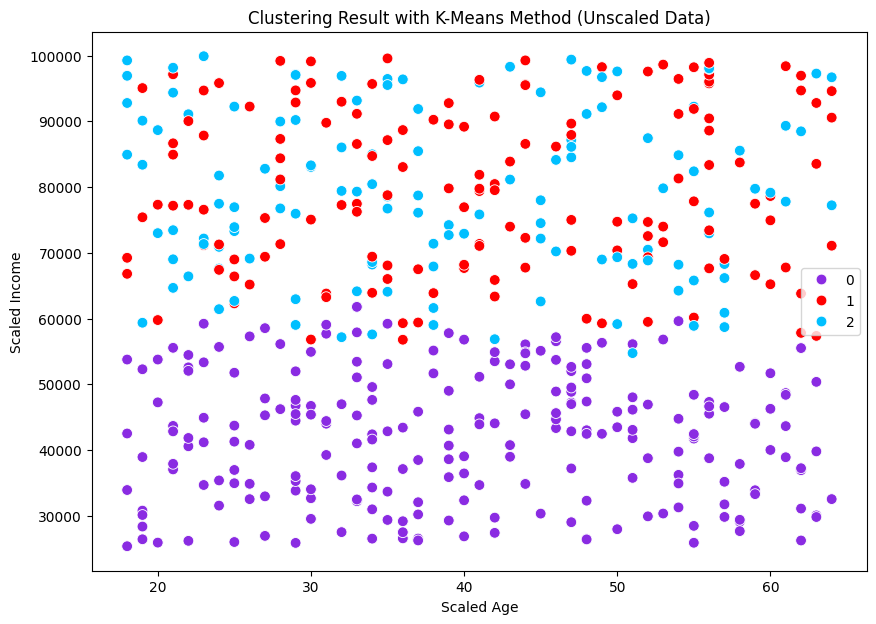

In [247]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Unscaled Data)")
plt.legend()
plt.show()

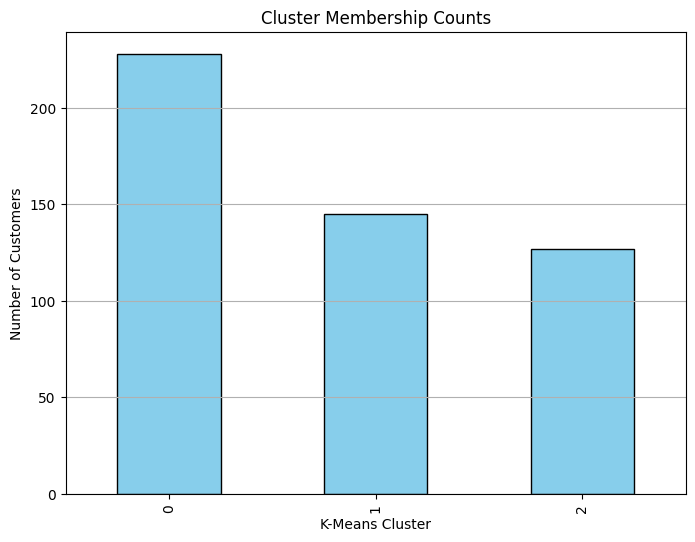

In [248]:
cluster_counts = df['KMeans_Cluster_unscaled'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


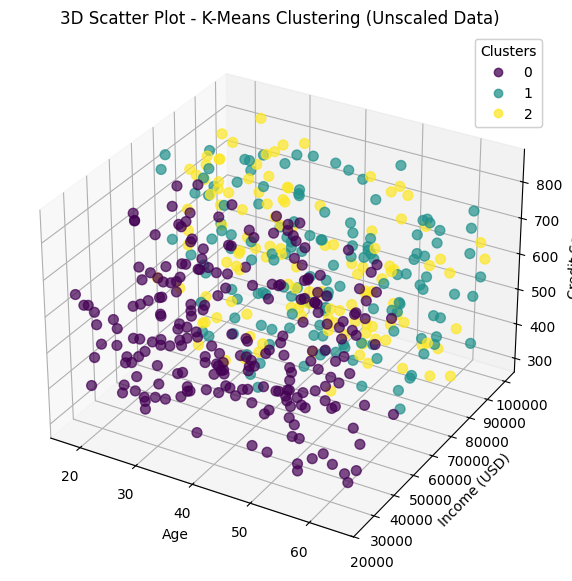

In [249]:
# --- 3D Scatter Plot for K-Means Clustering Result (Unscaled Data) ---

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Membuat figure dan axes 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot scatter 3D dengan warna berdasarkan cluster
scatter = ax.scatter(
    df['Age'],
    df['Income'],
    df['Credit_Score'],
    c=df['KMeans_Cluster_unscaled'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Label sumbu
ax.set_xlabel('Age')
ax.set_ylabel('Income (USD)')
ax.set_zlabel('Credit Score')

# Judul dan legenda
ax.set_title('3D Scatter Plot - K-Means Clustering (Unscaled Data)')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [250]:
# --- Group the data by cluster and calculate summary statistics for all features ---

cluster_summary = df.groupby(clusters).agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Credit_Score': ['mean', 'min', 'max'],
    'Years_with_Bank': ['mean', 'min', 'max'],
    'Transaction_Count': ['mean', 'min', 'max'],
    'Balance': ['mean', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'min', 'max'],
    'Online_Activity': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis('KMeans_Cluster_unscaled')

cluster_summary


Age                Income               \
                              mean min max          mean          min   
KMeans_Cluster_unscaled                                                 
0                        39.973684  18  64  41785.918734  25352.16071   
1                        41.193103  18  64  79841.469843  56774.10995   
2                        38.724409  18  64  78883.535088  54737.93056   

                                     Credit_Score           Years_with_Bank  \
                                 max         mean  min  max            mean   
KMeans_Cluster_unscaled                                                       
0                        61772.90099   563.355263  302  849       11.021930   
1                        99580.05922   560.434483  306  841       10.944828   
2                        99913.52549   573.133858  300  844       10.259843   

                         ... Credit_Card_Limit Purchase_Frequency            \
                         ...               max               mean       min   
KMeans_Cluster_unscaled  ...                                                  
0                        ...       19968.52056           0.512556  0.001914   
1                        ...       19557.51089           0.517569  0.000813   
2                        ...       19659.11871           0.507607  0.005398   

                                  Customer_Satisfaction          \
                              max                  mean min max   
KMeans_Cluster_unscaled                                           
0                        0.988192              2.539474   1   4   
1                        0.993942              2.593103   1   4   
2                        0.991089              2.574803   1   4   

                        Online_Activity                      
                                   mean       min       max  
KMeans_Cluster_unscaled                                      
0                              0.525803  0.001432  0.999897  
1                              0.474545  0.006100  0.994023  
2                              0.461151  0.001320  0.996199  

[3 rows x 33 columns]

**Comparison**

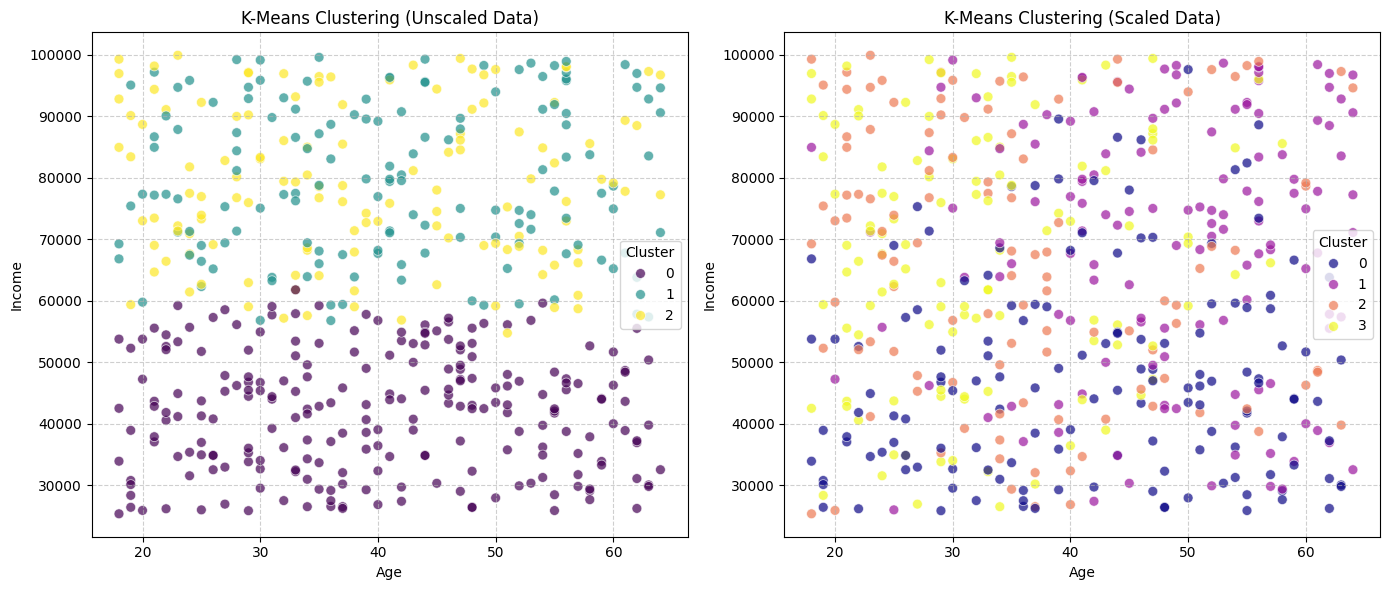

In [251]:
# --- Compare Clusters (Scaled vs Unscaled) using 2D Scatter Plot ---

plt.figure(figsize=(14,6))

# Unscaled
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='Age', y='Income',
    hue='KMeans_Cluster_unscaled',
    data=df, palette='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering (Unscaled Data)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.grid(axis='both', linestyle='--', alpha=0.6)

# Scaled
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='Age', y='Income',
    hue='KMeans_Cluster',
    data=df, palette='plasma', s=50, alpha=0.7)
plt.title('K-Means Clustering (Scaled Data)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.grid(axis='both', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



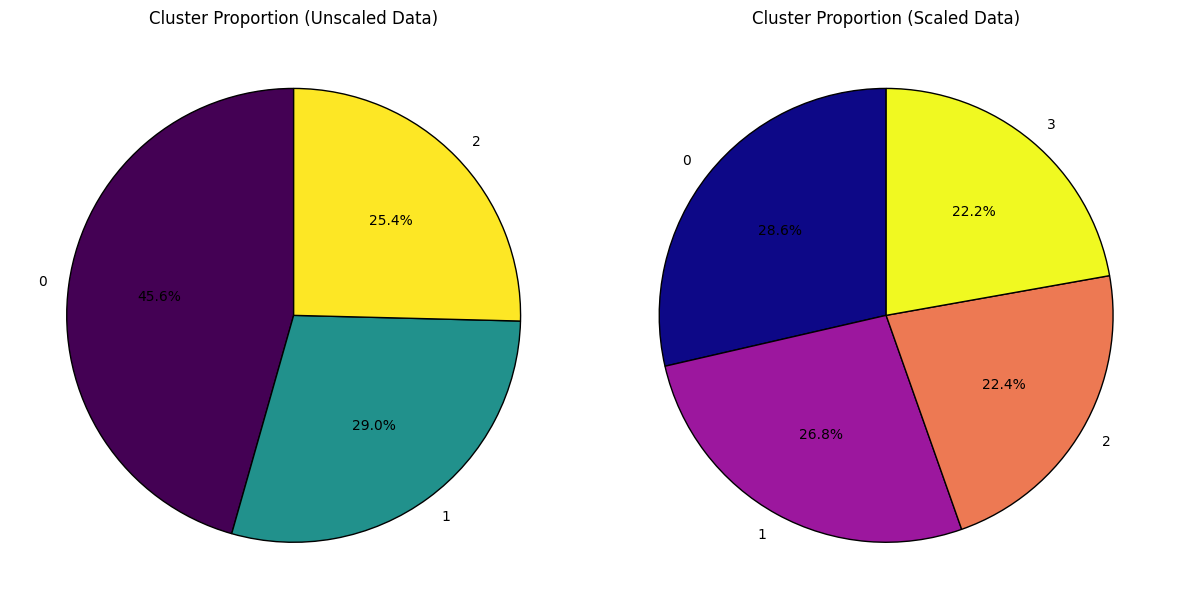

In [252]:
# --- Compare Clusters (Scaled vs Unscaled) using Pie Charts ---

import matplotlib.pyplot as plt

# Hitung jumlah anggota tiap cluster
unscaled_counts = df['KMeans_Cluster_unscaled'].value_counts().sort_index()
scaled_counts = df['KMeans_Cluster'].value_counts().sort_index()

# Warna otomatis sesuai jumlah cluster
colors_unscaled = plt.cm.viridis(np.linspace(0, 1, len(unscaled_counts)))
colors_scaled = plt.cm.plasma(np.linspace(0, 1, len(scaled_counts)))

# Plot dua pie chart berdampingan
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Unscaled data pie chart
axes[0].pie(unscaled_counts, labels=unscaled_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors_unscaled, wedgeprops={'edgecolor':'black'})
axes[0].set_title('Cluster Proportion (Unscaled Data)')

# Scaled data pie chart
axes[1].pie(scaled_counts, labels=scaled_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors_scaled, wedgeprops={'edgecolor':'black'})
axes[1].set_title('Cluster Proportion (Scaled Data)')

plt.tight_layout()
plt.show()


**Managerial Implications – Unscaled Clustering (KMeans_Cluster_unscaled)**
Cluster 0 – Mid-Age / Moderate-Income Consumers

Profile:

Average age around 40 years old.

Moderate income (~$41K average).

Medium credit score (~563).

Moderate customer satisfaction (~2.5/4).

Fairly active online users, indicating openness to digital banking.

Implications:

Focus on affordable financial products and savings solutions.

Offer basic credit cards or low-interest personal loans.

Use mobile apps and gamified loyalty programs to increase engagement.

Provide education on improving credit and long-term financial planning.

Cluster 1 – Mature / High-Income Professionals

Profile:

Average age ~41 years.

Highest income (~$79K average).

Good credit behavior and moderate satisfaction (~2.6/4).

Stable financially — likely senior professionals with strong purchasing power.

Implications:

Promote premium & personalized banking products (VIP accounts, investment portfolios).

Focus marketing on status, reliability, and convenience.

Prioritize for cross-selling and wealth management services.

Encourage loyalty through exclusive privileges and financial advisory support.

Cluster 2 – Younger-Mid / Moderate-High Income Segment

Profile:

Average age around 39 years.

Mid-to-high income (~$78K average).

Highest credit score (~573) among clusters.

High online activity and moderate satisfaction.

Implications:

Focus on digital-first financial products (mobile investments, e-wallets).

Target them through tech-savvy, lifestyle-based marketing.

Provide value-for-money bundles with transparent pricing.

Position the bank as a trusted digital partner for young professionals.

Managerial Implications Based on the Three Clusters
Cluster 0 – Mid-Age / Moderate-Income Consumers

Profile:

Average age around 40 years old (mostly between 35–45).

Moderate income level (~$41K average).

Medium credit score (~563) and medium account balance.

Average satisfaction (~2.5/4) with active online engagement.

Likely working professionals maintaining stable but not high-end financial conditions.

Implications:

Focus on affordable financial products (basic credit cards, savings plans, installment loans).

Use digital channels to engage (mobile apps, online rewards).

Provide financial planning tools to help improve savings and credit behavior.

Encourage loyalty via cashback or low-fee programs to increase retention.

Cluster 1 – Mature / High-Income Professionals

Profile:

Average age around 41 years.

Highest income group (~$79K average).

Solid credit score (~560) and relatively high transaction frequency.

Slightly higher satisfaction (~2.6/4) — prefer reliable, premium banking experiences.

Represent established professionals or senior employees with purchasing power.

Implications:

Target this group with premium financial products, such as platinum cards, high-limit loans, or investment portfolios.

Create exclusive loyalty or VIP programs emphasizing personalized service.

Use trust and reputation as key brand messages — highlight security, quality, and efficiency.

Prioritize them for cross-selling and upselling (e.g., wealth management, insurance, investments).

Cluster 2 – Younger-Mid / Moderate-High Income Segment

Profile:

Average age around 39 years (slightly younger than others).

Mid-to-high income (~$78K average).

Highest credit score (~573), indicating responsible financial behavior.

Moderate satisfaction (~2.57/4) and strong online activity.

Possibly mid-career customers, digitally active and financially aware.

Implications:

Offer value-for-money packages — combining affordability with digital convenience.

Position products that support lifestyle goals (home ownership, family security, investments).

Leverage online platforms and fintech collaborations for engagement.

Build trust-based loyalty via consistent support, transparent communication, and simple service interfaces.